TASK 1 Tagging a Person in Videos Taken in a Situation

In [25]:
#pip install opencv-python

import cv2
import numpy as np

# Load the video file
video_path =r"C:\Users\91924\Downloads\outdoor shoot_ walking towards camera (1).mp4"
cap = cv2.VideoCapture(video_path)

# Initialize background subtractor
back_sub = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50, detectShadows=True)

# Define parameters for tracking
person_id = None
person_color = (0, 255, 0)  # Bounding box color
font = cv2.FONT_HERSHEY_SIMPLEX

# Define a helper function for tracking by calculating centroids
def get_centroid(x, y, w, h):
    return (int(x + w / 2), int(y + h / 2))

# Process each frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Apply background subtraction to get moving areas
    fg_mask = back_sub.apply(frame)
    
    # Threshold the mask to binary
    _, fg_mask = cv2.threshold(fg_mask, 200, 255, cv2.THRESH_BINARY)
    
    # Find contours in the mask
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        # Filter out small contours to ignore noise
        if cv2.contourArea(cnt) < 1000:
            continue

        # Get bounding box around the contour
        x, y, w, h = cv2.boundingRect(cnt)
        
        # Assume largest contour area belongs to person
        centroid = get_centroid(x, y, w, h)

        # Draw bounding box and label
        cv2.rectangle(frame, (x, y), (x + w, y + h), person_color, 2)
        cv2.putText(frame, "Person", (x, y - 10), font, 0.6, person_color, 2)

    # Display the frame with the bounding box
    cv2.imshow("Tracking", frame)

    # Exit if 'q' is pressed
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

TASK 2 Strategic Marketing – Peak Shopping Duration

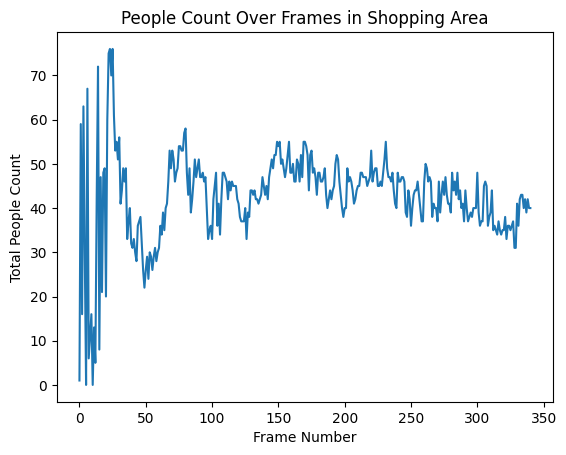

The peak shopping frame is frame number 23 with 76 people detected.


In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the video
video_path = r"C:\Users\91924\Downloads\Untitled video - Made with Clipchamp (2).mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Background subtractor for people detection
fgbg = cv2.createBackgroundSubtractorMOG2()
frame_counts = []

# People detection and counting with bounding boxes
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    fgmask = fgbg.apply(frame)
    contours, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    person_count = 0
    
    for cnt in contours:
        if cv2.contourArea(cnt) > 500:  # Filter noise
            person_count += 1
            # Draw bounding box
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green bounding box

    frame_counts.append(person_count)

    # Display the frame with bounding boxes
    cv2.imshow("People Detection with Bounding Boxes", frame)q
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Plot people counts with frame numbers as x-axis
plt.plot(range(len(frame_counts)), frame_counts)
plt.xlabel("Frame Number")
plt.ylabel("Total People Count")
plt.title("People Count Over Frames in Shopping Area")
plt.show()

# Identify peak frame for peak shopping duration
peak_frame_index = np.argmax(frame_counts)
print(f"The peak shopping frame is frame number {peak_frame_index} with {frame_counts[peak_frame_index]} people detected.")

# Display frames around the peak frame with bounding boxes
cap = cv2.VideoCapture(video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, max(0, peak_frame_index - 50))  # Start a bit before peak for context

for _ in range(100):  # Show 100 frames around the peak
    ret, frame = cap.read()
    if not ret:
        break

    # Detect people and draw bounding boxes again for display
    fgmask = fgbg.apply(frame)
    contours, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for cnt in contours:
        if cv2.contourArea(cnt) > 500:
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green bounding box

    cv2.imshow("Peak Shopping Frame with Bounding Boxes", frame)
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Task 3 Facial Recognition to Check Fraud Cases

In [1]:
import cv2
import numpy as np
import os


# Set paths for reference image and video
reference_image_path = r"C:\Users\91924\Downloads\jfvi.png"
video_path = r"C:\Users\91924\Downloads\videoplayback (3).mp4"

# Specify output folder for matched frames
output_folder = r"C:\Users\91924\Desktop\output_task3"
os.makedirs(output_folder, exist_ok=True)

# Load the reference image and convert it to grayscale
reference_image = cv2.imread(reference_image_path)
reference_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect face in the reference image
ref_faces = face_cascade.detectMultiScale(reference_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Ensure there's at least one face detected in the reference image
if len(ref_faces) == 0:
    print("No faces found in the reference image.")
    exit()
else:
    print(f"{len(ref_faces)} face(s) detected in the reference image.")

# Extract the detected face from the reference image (use the largest face)
x, y, w, h = max(ref_faces, key=lambda face: face[2] * face[3])
reference_face = reference_gray[y:y+h, x:x+w]

# Load the video
cap = cv2.VideoCapture(video_path)

# Initialize a frame counter
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the current frame
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    match_found = False  # Flag to check if any match is found in the current frame

    # Process each detected face in the frame
    for (fx, fy, fw, fh) in faces:
        # Extract the face from the frame
        face_in_frame = gray_frame[fy:fy+fh, fx:fx+fw]

        # Resize the reference face and detected face to the same size for comparison
        resized_reference = cv2.resize(reference_face, (fw, fh))
        match_result = cv2.matchTemplate(face_in_frame, resized_reference, cv2.TM_CCOEFF_NORMED)
        _, match_val, _, _ = cv2.minMaxLoc(match_result)

        # Check if match value exceeds threshold (indicates a match)
        match_threshold = 0.7
        if match_val > match_threshold:
            # Draw a rectangle around the matching face in the frame
            cv2.rectangle(frame, (fx, fy), (fx + fw, fy + fh), (0, 255, 0), 2)
            cv2.putText(frame, f'Match: {match_val:.2f}', (fx, fy - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            print(f"Match found in frame {frame_count} with similarity score: {match_val:.2f}")

            # Save the frame with match to the output folder
            output_frame_path = os.path.join(output_folder, f'frame_{frame_count}.jpg')
            cv2.imwrite(output_frame_path, frame)
            match_found = True

    # Display only frames with a detected match
    if match_found:
        cv2.imshow('Matching Frame', frame)

    # Break on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and close windows
cap.release()
cv2.destroyAllWindows()

2 face(s) detected in the reference image.
Match found in frame 440 with similarity score: 0.75
Match found in frame 442 with similarity score: 0.72
Match found in frame 443 with similarity score: 0.75
Match found in frame 444 with similarity score: 0.77
Match found in frame 445 with similarity score: 0.76
Match found in frame 447 with similarity score: 0.70
Match found in frame 450 with similarity score: 0.72
Match found in frame 451 with similarity score: 0.70
Match found in frame 454 with similarity score: 0.74
Match found in frame 455 with similarity score: 0.76
Match found in frame 456 with similarity score: 0.75
Match found in frame 484 with similarity score: 0.92
Match found in frame 485 with similarity score: 0.77
Match found in frame 486 with similarity score: 0.71
Match found in frame 489 with similarity score: 0.81
Match found in frame 490 with similarity score: 0.89
Match found in frame 491 with similarity score: 0.90
Match found in frame 492 with similarity score: 0.92
Mat

TASK 4 Number of People Entering and Exiting the Shop

In [35]:
import cv2
import numpy as np

# Load the video
video_path = r"C:\Users\91924\Downloads\videoplayback (1).mp4"  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

# Get the video frame dimensions
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define a larger ROI in the bottom-right corner
roi_width, roi_height = 300, 200  # Increase the size as needed
roi_x = frame_width - roi_width
roi_y = frame_height - roi_height

# Background subtraction for motion detection
fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50)

# Initialize counters for people entering and exiting
enter_count = 0
exit_count = 0

# Variables to hold movement direction and previous detections
last_direction = None
direction_threshold = 30  # Minimum movement threshold for counting
previous_centroids = []  # List to store centroids of previously detected people
distance_threshold = 50  # Minimum distance to consider a new person

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Define the ROI for detecting motion at the entrance
    roi = frame[roi_y:roi_y + roi_height, roi_x:roi_x + roi_width]
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    blurred_roi = cv2.GaussianBlur(gray_roi, (5, 5), 0)

    # Detect motion using background subtraction
    fg_mask = fgbg.apply(blurred_roi)
    _, fg_mask = cv2.threshold(fg_mask, 200, 255, cv2.THRESH_BINARY)

    # Find contours to identify moving objects
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    new_centroids = []

    for contour in contours:
        # Ignore small contours to avoid noise
        if cv2.contourArea(contour) < 1000:  # Adjust to filter out smaller objects
            continue

        # Draw bounding box around detected motion in the ROI
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(roi, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Calculate the centroid of the bounding box
        centroid_x = x + w // 2
        centroid_y = y + h // 2
        new_centroids.append((centroid_x, centroid_y))

        # Calculate movement direction (up for entering, down for exiting)
        if last_direction is None:
            last_direction = y
        else:
            direction = y - last_direction
            if abs(direction) > direction_threshold:
                if direction < 0:
                    # Check if this centroid is far enough from previous ones to count as a new person
                    is_new_person = True
                    for prev_centroid in previous_centroids:
                        if np.linalg.norm(np.array(prev_centroid) - np.array((centroid_x, centroid_y))) < distance_threshold:
                            is_new_person = False
                            break
                    if is_new_person:
                        enter_count += 1
                        previous_centroids.append((centroid_x, centroid_y))
                        print(f"Person entered, Total Entered: {enter_count}")
                elif direction > 0:
                    exit_count += 1
                    print(f"Person exited, Total Exited: {exit_count}")
                last_direction = y

    # Keep only recent centroids in the list to avoid memory build-up
    if len(previous_centroids) > 100:  # Store up to 100 centroids
        previous_centroids = previous_centroids[-100:]

    # Display the frame with ROI and motion highlighted
    cv2.rectangle(frame, (roi_x, roi_y), (roi_x + roi_width, roi_y + roi_height), (255, 0, 0), 2)
    
    # Add the entered and exited count inside the ROI box
    cv2.putText(roi, f"Entered: {enter_count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(roi, f"Exited: {exit_count}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Show the modified frame
    cv2.imshow("Shop Entrance", frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

print(f"Final count - Entered: {enter_count}, Exited: {exit_count}")


Person exited, Total Exited: 1
Person entered, Total Entered: 1
Person exited, Total Exited: 2
Person entered, Total Entered: 2
Person exited, Total Exited: 3
Person exited, Total Exited: 4
Person exited, Total Exited: 5
Person exited, Total Exited: 6
Person exited, Total Exited: 7
Person entered, Total Entered: 3
Person exited, Total Exited: 8
Person exited, Total Exited: 9
Person exited, Total Exited: 10
Person exited, Total Exited: 11
Person exited, Total Exited: 12
Person exited, Total Exited: 13
Person exited, Total Exited: 14
Person exited, Total Exited: 15
Person exited, Total Exited: 16
Person exited, Total Exited: 17
Person exited, Total Exited: 18
Person exited, Total Exited: 19
Person exited, Total Exited: 20
Person exited, Total Exited: 21
Person exited, Total Exited: 22
Person exited, Total Exited: 23
Person exited, Total Exited: 24
Person exited, Total Exited: 25
Person entered, Total Entered: 4
Person exited, Total Exited: 26
Person exited, Total Exited: 27
Person exited

TASK 5  Dwelling Time in a Shopping Mall


In [24]:
import cv2
import time

# Load the video
video_path = r"C:\Users\91924\Downloads\videoplayback (1).mp4"  # Replace with the path to your video file
cap = cv2.VideoCapture(video_path)

# Define the region of interest (ROI) in the video
roi_top_left = (200, 150)  # Top-left corner of the ROI
roi_bottom_right = (400, 350)  # Bottom-right corner of the ROI

# Initialize background subtractor for detecting moving objects
bg_subtractor = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50, detectShadows=True)

# Variables to track people and their dwelling times
dwelling_times = {}
person_id_counter = 0
min_distance = 50  # Minimum distance to consider two detections as the same person

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Define the ROI area
    roi_frame = frame[roi_top_left[1]:roi_bottom_right[1], roi_top_left[0]:roi_bottom_right[0]]
    cv2.rectangle(frame, roi_top_left, roi_bottom_right, (0, 255, 0), 2)

    # Apply background subtraction to the ROI
    fg_mask = bg_subtractor.apply(roi_frame)
    _, fg_mask = cv2.threshold(fg_mask, 244, 255, cv2.THRESH_BINARY)
    
    # Find contours in the foreground mask to detect people
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    current_frame_positions = []

    # Process each detected contour
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter out small detections
            (x, y, w, h) = cv2.boundingRect(contour)
            person_center = (roi_top_left[0] + x + w // 2, roi_top_left[1] + y + h // 2)
            current_frame_positions.append(person_center)

            # Check if this detected person is close to an already-tracked person
            person_id = None
            for pid, info in dwelling_times.items():
                # Calculate the distance between current detection and tracked person
                tracked_center = info['last_position']
                distance = ((person_center[0] - tracked_center[0]) ** 2 + (person_center[1] - tracked_center[1]) ** 2) ** 0.5

                if distance < min_distance:
                    person_id = pid
                    break

            # If no matching person is found, assign a new ID
            if person_id is None:
                person_id = person_id_counter
                dwelling_times[person_id] = {
                    "entry_time": time.time(),
                    "dwelling_time": 0,
                    "last_position": person_center
                }
                person_id_counter += 1

            # Update person's position and calculate dwelling time
            dwelling_times[person_id]["last_position"] = person_center
            dwelling_times[person_id]["dwelling_time"] = time.time() - dwelling_times[person_id]["entry_time"]

            # Draw bounding box and labels
            cv2.rectangle(frame, (roi_top_left[0] + x, roi_top_left[1] + y), 
                          (roi_top_left[0] + x + w, roi_top_left[1] + y + h), (0, 0, 255), 2)
            cv2.putText(frame, f"Person {person_id}", (person_center[0], person_center[1] - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
            cv2.putText(frame, f"Time: {dwelling_times[person_id]['dwelling_time']:.1f} sec",
                        (person_center[0], person_center[1] + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Display the frame with annotations
    cv2.imshow("Dwelling Time Tracking", frame)

    # Break if 'q' is pressed
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

# Print total dwelling time for each person tracked
print("Dwelling Times:")
for pid, times in dwelling_times.items():
    print(f"Person {pid}: {times['dwelling_time']:.2f} seconds")


Dwelling Times:
Person 0: 4.10 seconds
Person 1: 3.96 seconds
Person 2: 0.51 seconds
Person 3: 0.00 seconds
Person 4: 0.24 seconds
Person 5: 0.14 seconds


TASK 6 Spotting and Counting a Branded Car in a Video

In [ ]:
import cv2
import numpy as np

# Load the video
video_path = r"C:\Users\91924\Downloads\Supercars Face Off! Agera vs Regera, 918 vs Chiron, La Ferrari vs Huayra, Senna vs P1 & more.mp4"  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

# Define the color range for detecting a specific car color (e.g., red)
# You can adjust these ranges for other colors
lower_color = np.array([0, 120, 70])  # Lower bound of red in HSV
upper_color = np.array([10, 255, 255])  # Upper bound of red in HSV

# Initialize background subtractor for motion detection
fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50)

# Initialize counters for branded cars detected
color_car_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to HSV color space for better color segmentation
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Threshold the frame to get the regions with the specific color (e.g., red)
    mask = cv2.inRange(hsv_frame, lower_color, upper_color)

    # Use the mask to extract the color regions from the original frame
    color_detected_frame = cv2.bitwise_and(frame, frame, mask=mask)

    # Convert the frame to grayscale for motion detection
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply background subtraction
    fg_mask = fgbg.apply(gray_frame)
    _, fg_mask = cv2.threshold(fg_mask, 200, 255, cv2.THRESH_BINARY)

    # Find contours to detect moving objects (cars)
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        # Filter small contours (noise)
        if cv2.contourArea(contour) < 1000:
            continue
        
        # Get bounding box for the moving object (car)
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw bounding box

        # Extract the region of interest (ROI) to check for the detected color
        roi = color_detected_frame[y:y+h, x:x+w]
        
        # Check if there's a significant amount of color detected in the ROI
        color_pixels = cv2.countNonZero(cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY))
        roi_area = w * h

        if color_pixels > roi_area * 0.3:  # If 30% of the ROI has the target color
            color_car_count += 1
            # Draw a red rectangle around the detected car
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red for color match

    # Display the frame with bounding boxes and detections
    cv2.putText(frame, f"Color Cars Detected: {color_car_count}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow("Color Car Detection", frame)

    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

print(f"Total Color Cars Detected: {color_car_count}")

Total Color Cars Detected: 2
